In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Distributions

In [4]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

h=rand(Float64,12)





12-element Vector{Float64}:
 0.10221411443066097
 0.1554059477655937
 0.9208862314774119
 0.7513321400984232
 0.31840607114059083
 0.4638036785940868
 0.6422166201288364
 0.712279330369584
 0.4715900543492214
 0.12490193852052112
 0.9400974700456536
 0.9466946414119972

In [5]:

lambda=0.1;
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)))
ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


In [ ]:
UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)


In [15]:
mean(m)

6.280434914108077

In [3]:
h[1]

LoadError: UndefVarError: h not defined

In [ ]:

ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));

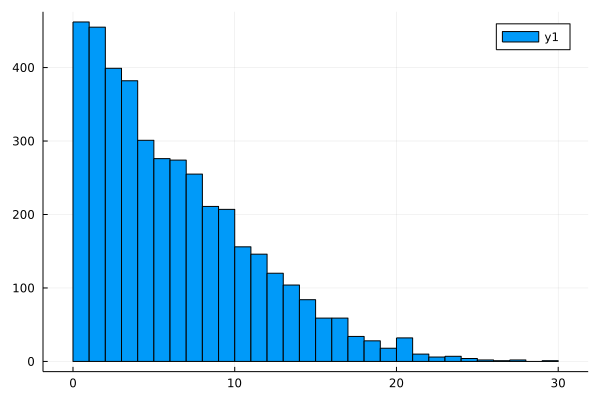

In [5]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);




lambda=0.95;
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)))
ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)


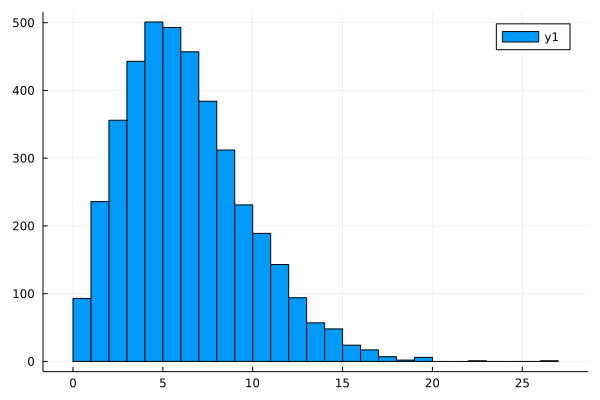

In [6]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);




lambda=1.0;
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)))
ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

histogram(m)


In [6]:
ordpar=fill(0.1,20);

In [ ]:
for l in 1:20
    lambda=l*0.05;
    
UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

ordpar[l]=mean(m);
end
ordpar

In [16]:
xax=1:20

1:20